<H1 style="color:#8B7959">ADIA</H1>

<H2 style="color:#8B7959">PIPELINE EXAMPLE</H2>

In [1]:
import sys

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

github_folder_path = r'..'  # Relative path
if github_folder_path not in sys.path:
    sys.path.append(github_folder_path)

from L0_Library.config import *
from L1_Dev.data_prep import DataPrep
from L1_Dev.news import News
from L1_Dev.clusters import Clusters
from L1_Dev.fitting import Fitting

In [3]:
START_DATE = datetime(2019, 1, 1)
END_DATE = datetime(2019, 12, 31)

In [4]:
pipeline = DataPrep(API_key='db-SEbmRhQ3ekjnrdRQLfK4iDYJhVkrL',
                    dataset='XNAS.ITCH',
                    start_date=datetime(2022, 2, 1),  # Might be good to use datetime.date
                    start_hour=9,
                    start_minute=30,
                    end_date=datetime(2022, 2, 5),
                    end_hour=16,
                    end_minute=0,
                    time_zone='US/Eastern')

In [5]:
pipeline_news = News(base_url='https://stocknewsapi.com/api/v1',
                     API_key='7vjl2kzbnxdltdz2hxixyzhbc07yltk4keyh5az9',
                     start_date=datetime(2019, 1, 1),
                     end_date=datetime(2020, 3, 7))

In [6]:
clusters = Clusters()

In [7]:
fitting = Fitting()

<H3 style="color:#8B7959">LOB DATA</H3>

In [16]:
# Get data from DataBento

## LOB/tick data
# df_lob_data, trading_days, trading_dates = pipeline.get_data_mbp('MBTC')

## OHLCV data
df_lob_data, trading_days, trading_dates = pipeline.get_data_ohlcv(symbol='BAC')

df_lob_data

Processing: 100%|█████████████████████████████████████████████████████| 5/5 [00:07<00:00,  1.43s/it]


,symbol,open,high,low,close,volume
ts_event,,,,,,
2022-02-01 09:30:00,BAC,46.20000,46.22000,45.96000,46.10000,53675
2022-02-01 09:31:00,BAC,46.09000,46.10500,45.91000,45.92000,24824
2022-02-01 09:32:00,BAC,45.92000,46.03000,45.91000,45.99000,19067
2022-02-01 09:33:00,BAC,46.03000,46.03000,45.94000,46.01000,15901
2022-02-01 09:34:00,BAC,46.01000,46.13000,45.97000,46.12000,14341
...,...,...,...,...,...,...
2022-02-04 15:55:00,BAC,48.49000,48.49000,48.42500,48.43000,35943
2022-02-04 15:56:00,BAC,48.43000,48.44000,48.40000,48.41500,40654
2022-02-04 15:57:00,BAC,48.42000,48.43000,48.39000,48.40000,32783


<H3 style="color:#8B7959">PRICES</H3>

In [17]:
# Calculate prices

## LOB/tick data
# df_prices = pipeline.mid_price(df_input=df_lob_data, resample_freq='1T', type_mid='vwmp', drop_na=False)

## OHLCV data (Improve so that always creates index between 9:30 and 15:59)
df_prices = pipeline.price_ohlc(df_input=df_lob_data, price_type='close', resample_freq='1T', drop_na=False)

df_prices

Date,2022-02-01,2022-02-02,2022-02-03,2022-02-04
Hour,,,,
09:30:00,46.10000,46.80000,47.13000,47.06000
09:31:00,45.92000,46.75000,47.09000,47.12000
09:32:00,45.99000,46.79000,46.97000,47.06000
09:33:00,46.01000,46.84000,46.99000,46.85000
09:34:00,46.12000,46.72000,46.80000,46.76000
...,...,...,...,...
15:55:00,47.01000,46.87000,46.50000,48.43000
15:56:00,47.00500,46.88500,46.44000,48.41500
15:57:00,46.97500,46.89500,46.42500,48.40000


In [20]:
df_lob_data.unstack()

        ts_event           
symbol  2022-02-01 09:30:00      BAC
        2022-02-01 09:31:00      BAC
        2022-02-01 09:32:00      BAC
        2022-02-01 09:33:00      BAC
        2022-02-01 09:34:00      BAC
                               ...  
volume  2022-02-04 15:55:00    35943
        2022-02-04 15:56:00    40654
        2022-02-04 15:57:00    32783
        2022-02-04 15:58:00    34292
        2022-02-04 15:59:00    82088
Length: 9354, dtype: object

<H3 style="color:#8B7959">RETURNS</H3>

In [18]:
# Calculate returns
df_returns = pipeline.returns(df_input=df_prices)
df_returns

Date,2022-02-01,2022-02-02,2022-02-03,2022-02-04
Hour,,,,
09:30:00,NaN,NaN,NaN,NaN
09:31:00,-0.00391,-0.00107,-0.00085,0.00127
09:32:00,0.00152,0.00086,-0.00255,-0.00127
09:33:00,0.00043,0.00107,0.00043,-0.00447
09:34:00,0.00239,-0.00257,-0.00405,-0.00192
...,...,...,...,...
15:55:00,0.00000,0.00011,0.00151,-0.00124
15:56:00,-0.00011,0.00032,-0.00129,-0.00031
15:57:00,-0.00064,0.00021,-0.00032,-0.00031


In [ ]:
import math

def garman_klass_volatility(high_prices, low_prices, close_prices, open_prices):
    n = len(high_prices)
    sum1 = 0
    sum2 = 0

    for i in range(n):
        log_hl = math.log(high_prices[i] / low_prices[i]) ** 2
        log_co = math.log(close_prices[i] / open_prices[i]) ** 2
        sum1 += log_hl
        sum2 += log_co

    volatility = math.sqrt((1/n) * sum1 - (2/n) * sum2)
    return volatility

# Example usage
high_prices = pd.Series([50.0, 51.0, 52.0, 53.0, 54.0])
low_prices = pd.Series([48.0, 49.0, 50.0, 51.0, 52.0])
close_prices = pd.Series([49.0, 50.0, 51.0, 52.0, 53.0])
open_prices = pd.Series([49.5, 50.5, 51.5, 52.5, 53.5])

volatility = garman_klass_volatility(high_prices, low_prices, close_prices, open_prices)
print(f"Garman-Klass Volatility: {volatility}")


In [ ]:
df_temp = .unstack()
df_temp.dropna(inplace=True)
# Calculate the rolling bipower variation using a lambda function
df_temp = df_temp.rolling(window=K).apply(lambda x: self.bipower_variation(x, K=K))
df_temp = df_temp.reset_index()
df_temp.rename(columns={0: 'bipower_variation'}, inplace=True)
df_result = df_input.unstack().reset_index().merge(df_temp, on=['Date', 'Hour'], how='left').drop(0, axis=1)
df_result = df_result.pivot(index='Hour', columns='Date', values=f'bipower_variation')

pd.options.display.float_format = '{:,.10f}'.format

<H3 style="color:#8B7959">BIPOWER VARIATION</H3>

In [ ]:
# Calculate bipower variation
df_bipower_variation = pipeline.rolling_bipower_variation(df_input=df_returns, K=390)
df_bipower_variation

<H3 style="color:#8B7959">PERIODICITY</H3>

In [ ]:
# Calculate periodicity
df_std_returns_1 = df_returns / np.sqrt(df_bipower_variation)
df_f0 = pipeline.df_periodicity(df_input=df_std_returns_1, threshold=16)
df_std_returns_2 = df_std_returns_1 / df_f0
df_f1 = pipeline.df_periodicity(df_input=df_std_returns_2, threshold=6.635)
df_f = df_f0 * df_f1
df_f

In [ ]:
# Plot periodicity
sns.set_style("whitegrid")
plt.scatter(pd.to_datetime(df_f0.index, format='%H:%M:%S'), df_f0.iloc[:, 1], label='f_0', marker='o')
plt.scatter(pd.to_datetime(df_f.index, format='%H:%M:%S'), df_f.iloc[:, 1], label='f', marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=0)
plt.xlabel('Market Hour')
plt.ylabel('Periodicity')
plt.title('Periodicity by Minute')
plt.legend()
plt.tight_layout()
plt.show()

<H3 style="color:#8B7959">JUMP SCORE</H3>

In [ ]:
# Calculate jump score
df_jump_score = pipeline.jump_score(df_returns=df_returns, df_bipower_variation=df_bipower_variation, df_f=df_f)
df_jump_score

In [ ]:
# Calculate quantiles and generate the QQ plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
stats.probplot(df_returns.unstack().dropna(), dist='norm', plot=axes[0])
axes[0].set_title('Returns QQ Plot')
axes[0].set_ylabel('Ordered Values')
stats.probplot(df_std_returns_1.unstack().dropna(), dist='norm', plot=axes[1])
axes[1].set_title('Std Returns #1 QQ Plot')
axes[1].set_ylabel('')
stats.probplot(df_std_returns_2.unstack().dropna(), dist='norm', plot=axes[2])
axes[2].set_title('Std Returns #2 QQ Plot')
axes[2].set_ylabel('')
stats.probplot(df_jump_score.unstack().dropna(), dist='norm', plot=axes[3])
axes[3].set_title('Jump Score QQ Plot')
axes[3].set_ylabel('')
plt.show()

<H3 style="color:#8B7959">JUMPS</H3>

In [ ]:
# Get jumps
df_jumps = pipeline.get_jumps(df_input=df_jump_score)
print(f'Total Number of Jumps Detected: {df_jumps.sum().sum()}')
pd.DataFrame(df_jumps.unstack()[df_jumps.unstack() == 1]).rename(columns={0: 'Jump'})

# Filter jumps
# df_jumps[(df_jumps.index < pd.to_datetime('09:37:00').time())]
# df_jumps.loc[pd.to_datetime('09:37:00').time(), '2019-01-03']

In [ ]:
l_jumps_timestamp = clusters.jumps_timestamp(df_input=df_jumps)
iter_jumps_timestamp = iter(l_jumps_timestamp)

In [ ]:
# plot_date = 3
plot_date = l_jumps_timestamp.index(next(iter_jumps_timestamp))

ax = abs(df_jump_score[l_jumps_timestamp[plot_date]]).plot(ylabel='Jump Score',
                                      
                                                           title=f'Jump Scores on {l_jumps_timestamp[plot_date]}', alpha=0.7)
markers = [i if i > 4.36 else np.nan for i in abs(df_jump_score[l_jumps_timestamp[plot_date]])]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

<H3 style="color:#8B7959">JUMPS INTER-TIMES</H3>

In [ ]:
df_inter_times = clusters.calculate_jump_inter_times(df_input=df_jumps, list_input=l_jumps_timestamp)
pd.DataFrame(df_inter_times.unstack()[df_inter_times.unstack() > 0]).rename(columns={0: 'Jump Inter-Times'})

<H3 style="color:#8B7959">BERNOULLI HYPOTHESIS-TEST IMPLIED PROBABILITY</H3>

In [ ]:
df_bernoulli_p = clusters.bernoulli_trials_p(df_input=df_jumps, rolling_window=7780, epsilon=0.05) # Fix prob 0 which makes threshold inf
pd.DataFrame(df_bernoulli_p.unstack()[df_bernoulli_p.unstack() > 0]).rename(columns={0: 'Bernoulli P'})

<H3 style="color:#8B7959">BERNOULLI HYPOTHESIS-TEST IMPLIED THRESHOLD</H3>

In [ ]:
df_threshold = clusters.bernoulli_hypothesis_threshold(df_input=df_bernoulli_p, epsilon=0.05)
pd.DataFrame(df_threshold.unstack()[df_threshold.unstack() > 0]).rename(columns={0: 'Bernoulli P'})

In [ ]:
df_threshold.unstack().dropna()[df_threshold.unstack().dropna() == np.inf]

<H3 style="color:#8B7959">CLUSTERED JUMPS</H3>

In [ ]:
df_clustered_jumps = clusters.cluster_jumps(df_jumps=df_jumps, df_inter_times=df_inter_times, df_threshold=df_threshold)
print(f'Total Number of Jump Clusters Detected: {df_clustered_jumps.sum().sum()}')
pd.DataFrame(df_clustered_jumps.unstack()[df_clustered_jumps.unstack() == 1]).rename(columns={0: 'Clustered Jumps'})

In [ ]:
l_clustered_jumps_timestamp = clusters.jumps_timestamp(df_input=df_clustered_jumps)
iter_clustered_jumps_timestamp = iter(l_clustered_jumps_timestamp)

In [ ]:
# plot_date = 47
plot_date = l_clustered_jumps_timestamp.index(next(iter_clustered_jumps_timestamp))

ax = abs(df_jump_score[l_clustered_jumps_timestamp[plot_date]]).plot(ylabel='Jump Score',
                                                                     title=f'Clustered Jump Scores on {l_clustered_jumps_timestamp[plot_date]}',
                                                                     alpha=0.7)
markers = [value if (value > 4.36) & (df_clustered_jumps[l_clustered_jumps_timestamp[plot_date]].iloc[index] == 1) \
           else np.nan for index, value in enumerate(abs(df_jump_score[l_clustered_jumps_timestamp[plot_date]]))]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

<H3 style="color:#8B7959">JUMP SERIES</H3>

In [ ]:
dicf_jumps_timestamp, dict_jump_series = fitting.jump_series(df_input=df_clustered_jumps, df_jump_score=df_jump_score, 
                                                             input_list=l_clustered_jumps_timestamp, window_size=160)

<H3 style="color:#8B7959">JUMP FITTING</H3>

In [ ]:
dates_iter = iter(list(dicf_jumps_timestamp.keys()))

In [ ]:
time_iter = iter([i[0] for i in dicf_jumps_timestamp.values()])

In [ ]:
test_double = dict_jump_series[next(dates_iter)][next(time_iter)]

In [ ]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define the double power-law function
def double_power_law(params, t):
    N_l, N_r, p_l, p_r, d = params
    theta_l = np.where(t < 0, 1.0, 0.0)
    theta_r = np.where(t >= 0, 1.0, 0.0)
    return (N_l * theta_l * np.abs(t)**p_l) + (N_r * theta_r * np.abs(t)**p_r) + d

# Define the residual function for the least squares optimization
def residual(params, t, y):
    return y - double_power_law(params, t)

# Generate or load your data (replace with your own data)
t_data = test_double.index
y_data = test_double

# Initial guess for the parameters [N_l, N_r, p_l, p_r, d]
initial_params = [1.0, 1.0, 1.0, 1.0, 0.0]

# Fit the double power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(t_data, y_data))

# Extract the fitted parameters
N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit = result.x

# Calculate the fitted values using the original t values
y_fit = double_power_law([N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit], t_data)

# Plot the original data and the fitted curve
plt.plot(t_data, y_data, label='Original Data', marker='o', alpha=0.5)
plt.plot(t_data, y_fit, 'r-', label='Fitted Curve')
plt.title('Double Power-Law')
plt.xlabel('t')
plt.ylabel('Jump Score')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"N_l: {N_l_fit}")
print(f"N_r: {N_r_fit}")
print(f"p_l: {p_l_fit}")
print(f"p_r: {p_r_fit}")
print(f"d: {d_fit}")


In [ ]:
# FITTING EXAMPLE

In [ ]:
abs(df_jump_score[l_jumps_timestamp[3]]).plot()

In [ ]:
test = df_jump_score[l_jumps_timestamp[3]].dropna().reset_index(drop=True)
test[test == -6.956441675069235]

In [ ]:
test_double = pd.DataFrame(test[252:388])
test = pd.DataFrame(test[320:388])
test

In [ ]:
test.index = test.index - 320
test_double.index = test_double.index - 320

In [ ]:
test = abs(test)
test_double = abs(test_double)
test.plot()

In [ ]:
test = test.reset_index()
test_double = test_double.reset_index()

In [ ]:
test.columns=['x', 'y']
test_double.columns=['x', 'y']

In [ ]:
test_double

In [ ]:
# As stated in the paper, it is easier to fit the cummulative function
test.cumsum()['x'].plot()

In [ ]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define the double power-law function
def double_power_law(params, t):
    N_l, N_r, p_l, p_r, d = params
    theta_l = np.where(t < 0, 1.0, 0.0)
    theta_r = np.where(t >= 0, 1.0, 0.0)
    return (N_l * theta_l * np.abs(t)**p_l) + (N_r * theta_r * np.abs(t)**p_r) + d

# Define the residual function for the least squares optimization
def residual(params, t, y):
    return y - double_power_law(params, t)

# Generate or load your data (replace with your own data)
t_data = test_double['x']
y_data = test_double['y']

# Initial guess for the parameters [N_l, N_r, p_l, p_r, d]
initial_params = [1.0, 1.0, 1.0, 1.0, 0.0]

# Fit the double power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(t_data, y_data))

# Extract the fitted parameters
N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit = result.x

# Calculate the fitted values using the original t values
y_fit = double_power_law([N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit], t_data)

# Plot the original data and the fitted curve
plt.plot(t_data, y_data, label='Original Data', marker='o', alpha=0.5)
plt.plot(t_data, y_fit, 'r-', label='Fitted Curve')
plt.title('Double Power-Law')
plt.xlabel('t')
plt.ylabel('Jump Score')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"N_l: {N_l_fit}")
print(f"N_r: {N_r_fit}")
print(f"p_l: {p_l_fit}")
print(f"p_r: {p_r_fit}")
print(f"d: {d_fit}")


<H3 style="color:#8B7959">STORE DATA IN HDF5 FORMAT</H3>

We could compare how much it would take to store the files in different formats. I pick the most efficient.
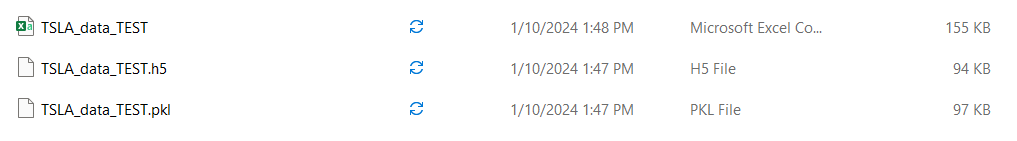

In [ ]:
# WRITE
hdf5_file_path = '../Data/TSLA_data.h5'

# Write the DataFrames to the HDF5 file
df_prices.to_hdf(hdf5_file_path, key='prices', mode='w')
df_returns.to_hdf(hdf5_file_path, key='returns', mode='a')
df_bipower_variation.to_hdf(hdf5_file_path, key='bipower_variation', mode='a')
df_f0.to_hdf(hdf5_file_path, key='periodicity_0', mode='a')
df_f1.to_hdf(hdf5_file_path, key='periodicity_1', mode='a')
df_f.to_hdf(hdf5_file_path, key='periodicity', mode='a')
df_jump_score.to_hdf(hdf5_file_path, key='jump_score', mode='a')
df_jumps.to_hdf(hdf5_file_path, key='jumps', mode='a')

# Create an HDF5 file and write DataFrames to it
with h5py.File(hdf5_file_path, 'a') as hdf_file:    
    # Add attributes to the file level
    hdf_file.attrs['Description'] = 'HDF5 File storing data pipeline'
    hdf_file.attrs['Start_Date'] = '01-01-2019'
    hdf_file.attrs['End_Date'] = '01-01-2019'
    hdf_file.attrs['Start_Time'] = '09:30'
    hdf_file.attrs['End_Time'] = '16:00'
    hdf_file.attrs['Time_Zone'] = 'US/Eastern'

In [ ]:
# READ
hdf5_file_path = '../Data/TSLA_data.h5'

# Read the DataFrames from the HDF5 file
df_prices = pd.read_hdf(hdf5_file_path, key='prices')
df_returns = pd.read_hdf(hdf5_file_path, key='returns')
df_bipower_variation = pd.read_hdf(hdf5_file_path, key='bipower_variation')
df_f0 = pd.read_hdf(hdf5_file_path, key='periodicity_0')
df_f1 = pd.read_hdf(hdf5_file_path, key='periodicity_1')
df_f = pd.read_hdf(hdf5_file_path, key='periodicity')
df_jump_score = pd.read_hdf(hdf5_file_path, key='jump_score')
df_jumps = pd.read_hdf(hdf5_file_path, key='jumps')

# Open the HDF5 file to read attributes
with h5py.File('../Data/TSLA_data.h5', 'r') as hdf_file:
    # Get the attributes of the root group (the file itself)
    for attr_name, attr_value in hdf_file.attrs.items():
        if attr_name not in ['CLASS', 'VERSION', 'PYTABLES_FORMAT_VERSION', 'TITLE']:
            print(f"{attr_name}: {attr_value}")

<H3 style="color:#8B7959">NEWS</H3>

In [ ]:
response = pipeline_news.get_news(symbol=['LULU'], items=4, page=1, news_type='article')

In [ ]:
try:
    for article in response[:4]:
        print(f"Title: {article['title']}")
        print(f"URL: {article['news_url']}")
        print(f"Image URL: {article['image_url']}")
        print(f"Text: {article['text']}")
        print(f"Source Name: {article['source_name']}")
        print(f"Date: {article['date']}")
        print(f"Topics: {article['topics']}")
        print(f"Sentiment: {article['sentiment']}")
        print(f"Type: {article['type']}")
        print(f"Tickers: {article['tickers']}\n")
except requests.exceptions.HTTPError as err:
    print(f"An error occurred: {err}")

CLUSTERING

In [ ]:
df_input = df_jumps
list_input = l_jumps_timestamp

df_result = df_input.copy()
for i in list_input:
    if df_input[i].sum() > 1:
        mask = np.array(df_input[i] == 1)
        series = pd.Series(range(len(df_input[i])))[mask]
        shifted_shifted = series - series.shift(1) - 1
        shifted_shifted = shifted_shifted.replace(np.nan, np.inf)
        df_result[i].iloc[shifted_shifted.index] = shifted_shifted
    else:
        df_result[i] = df_input[i].replace(1, np.inf)
        
df_inter_times = df_result

In [ ]:
df_inter_times[list_input[9]].to_numpy()

In [ ]:
df_input = df_jumps
rolling_window = 7780
epsilon = 0.05

def min_bernoulli_trials_p(row, epsilon):
    if row['jumps'] > epsilon:
        return epsilon
    else:
        return row['jumps']
    
df_input_unstack = df_input.unstack().reset_index().rename(columns={0: 'jumps'})
df_input_unstack['jumps'] = np.nan

s_bernoulli_trials_p = df_input.unstack().dropna().rolling(rolling_window).sum() / rolling_window
s_bernoulli_trials_p = s_bernoulli_trials_p.reset_index().rename(columns={0: 'jumps'})

df_result = pd.merge(df_input_unstack, s_bernoulli_trials_p,
                     on=['Date', 'Hour'], how='left')[['Date', 'Hour', 'jumps_y']]
df_result = df_result.rename(columns={'jumps_y': 'jumps'})

df_result['jumps'] = df_result.apply(lambda row: min_bernoulli_trials_p(row, epsilon), axis=1)

df_result = df_result.pivot(index='Hour', columns='Date', values=f'jumps')

df_result

In [ ]:
df_threshold = (np.log(1 - epsilon) / np.log(1 - df_result)) - 1

In [ ]:
df_threshold

In [ ]:
df_clustered_jumps = df_inter_times.where(df_threshold.notna(), np.nan)

df_test = df_jumps.where(df_threshold.notna(), np.nan)
l_jumps_timestamp_test = clusters.jumps_timestamp(df_input=df_test)

for i in l_jumps_timestamp_test:
    s_inter_times = df_inter_times[i]
    s_threshold = df_threshold[i]
    s_clustered_jumps = df_clustered_jumps[i]
    for j in range(len(s_inter_times)):
        if s_inter_times[j] == np.inf:
            s_clustered_jumps[j] = 1
        elif s_inter_times[j] < s_threshold[j]:
            s_clustered_jumps[j] = 0
        elif s_inter_times[j] >= s_threshold[j]:
            s_clustered_jumps[j] = 1
    df_clustered_jumps[i] = s_clustered_jumps

In [ ]:
df_clustered_jumps

In [ ]:
l_clustered_jumps_timestamp = clusters.jumps_timestamp(df_input=df_clustered_jumps)
iter_clustered_jumps_timestamp = iter(l_clustered_jumps_timestamp)

In [ ]:
# plot_date = 47
plot_date = l_clustered_jumps_timestamp.index(next(iter_clustered_jumps_timestamp))

ax = abs(df_jump_score[l_clustered_jumps_timestamp[plot_date]]).plot(ylabel='Jump Score',
                                                                     title=f'Clustered Jump Scores on {l_clustered_jumps_timestamp[plot_date]}',
                                                                     alpha=0.7)
markers = [value if (value > 4.36) & (df_clustered_jumps[l_clustered_jumps_timestamp[plot_date]].iloc[index] == 1) \
           else np.nan for index, value in enumerate(abs(df_jump_score[l_clustered_jumps_timestamp[plot_date]]))]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()